<a href="https://colab.research.google.com/github/Adsgfsbfx/Credit_scoring_model/blob/main/Credit_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_application_record = pd.read_csv("/content/drive/MyDrive/application_record.csv.zip")
df_credit_record = pd.read_csv("/content/drive/MyDrive/credit_record.csv.zip")

print(df_application_record.info())
print(df_application_record.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_application_record = df_application_record.drop_duplicates(subset = 'ID', keep = False)
df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
print("unique IDs that are consistent between both datasets", df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]['ID'].nunique())

#adjust the dataframes so that we only work with the consistent IDs
df_application_record = df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]
df_credit_record = df_credit_record[df_credit_record['ID'].isin(df_application_record['ID'])]
print(" IDs in application_record", df_application_record['ID'].nunique())
print("  IDs in credit_record", df_credit_record['ID'].nunique())

unique IDs that are consistent between both datasets 36457
 IDs in application_record 36457
  IDs in credit_record 36457


In [ ]:
df_application_record = df_application_record.drop(columns=['CODE_GENDER', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH'])

In [ ]:
def determine_approval(df):
    if(df['STATUS'] == 'X'): return -1
    elif(df['STATUS'] == '1' or df['STATUS'] == '2' or df['STATUS'] == '3' or df['STATUS'] == '4' or df['STATUS'] == '5'): return 0
    elif(df['STATUS'] == 'C' or df['STATUS'] == '0'): return 1

In [ ]:
df_credit_record['APPROVED'] = df_credit_record.apply(determine_approval, axis=1)
df_credit_record = df_credit_record[df_credit_record['APPROVED']!=-1]
df_credit_record['STATUS'].value_counts()

C    329536
0    290654
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [ ]:
df_application_record = df_application_record.merge(df_credit_record, on='ID')
df_application_record.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,APPROVED
0,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,0,C,1
1,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-1,C,1
2,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-2,C,1
3,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-3,C,1
4,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-4,C,1
5,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-5,C,1
6,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-6,C,1
7,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-7,C,1
8,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-8,C,1
9,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-9,C,1


In [ ]:
df_application_record = df_application_record[df_application_record['MONTHS_BALANCE']==-4]

In [ ]:
df_application_record.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,APPROVED
4,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-4,C,1
19,5008805,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-4,C,1
33,5008806,Y,Y,0,112500.0,Working,Secondary / secondary special,House / apartment,-1134,1,0,0,0,Security staff,2.0,-4,C,1
49,5008810,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-3051,1,0,1,1,Sales staff,1.0,-4,C,1
70,5008811,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-3051,1,0,1,1,Sales staff,1.0,-4,C,1


Text(0.5, 1.0, 'Income types for those with no stated occupation')

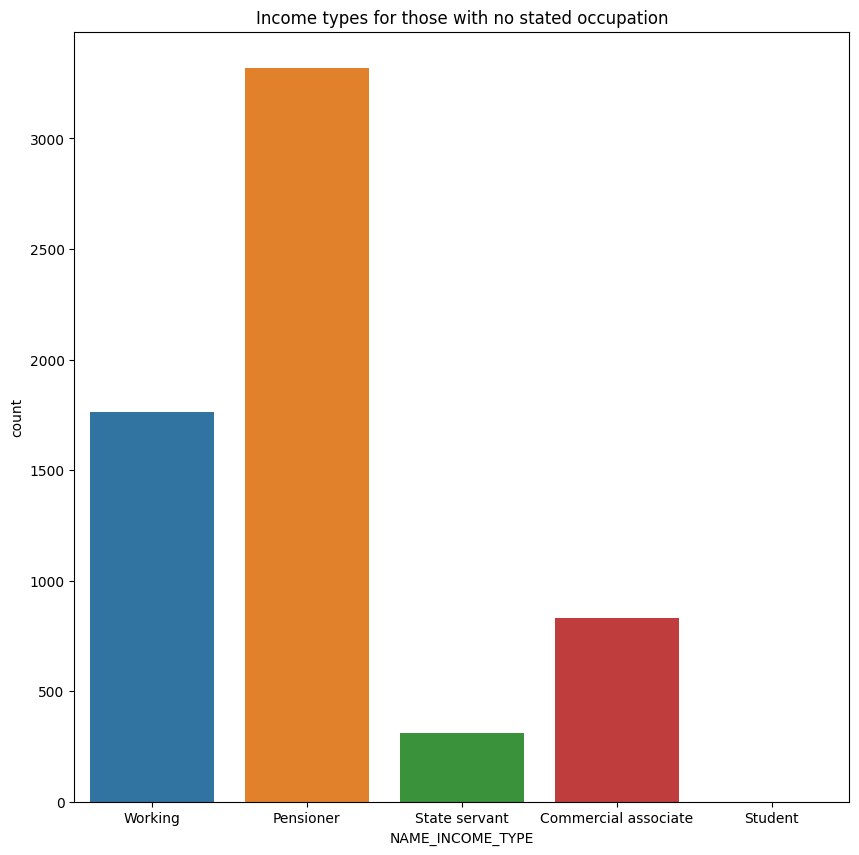

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x= df_application_record[df_application_record["OCCUPATION_TYPE"].isna()]["NAME_INCOME_TYPE"])
plt.title("Income types for those with no stated occupation")

In [ ]:
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Pensioner","OCCUPATION_TYPE"] = "Pension"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Commercial associate","OCCUPATION_TYPE"] = "Commercial associate"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="State servant","OCCUPATION_TYPE"] = "State servant"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Student","OCCUPATION_TYPE"] = "Student"
df_application_record = df_application_record.dropna()
df_application_record.isna().sum()

ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
APPROVED               0
dtype: int64

In [ ]:
print(df_application_record[df_application_record['DAYS_EMPLOYED'] > 50000].count())
#its impossible for someone to have over 50000 days of employment. Thats over 270 years, so we will drop all these values
df_application_record = df_application_record.drop(df_application_record[df_application_record['DAYS_EMPLOYED']>100000].index)
df_application_record = df_application_record.drop(columns=['STATUS'])

ID                     3313
FLAG_OWN_CAR           3313
FLAG_OWN_REALTY        3313
CNT_CHILDREN           3313
AMT_INCOME_TOTAL       3313
NAME_INCOME_TYPE       3313
NAME_EDUCATION_TYPE    3313
NAME_HOUSING_TYPE      3313
DAYS_EMPLOYED          3313
FLAG_MOBIL             3313
FLAG_WORK_PHONE        3313
FLAG_PHONE             3313
FLAG_EMAIL             3313
OCCUPATION_TYPE        3313
CNT_FAM_MEMBERS        3313
MONTHS_BALANCE         3313
STATUS                 3313
APPROVED               3313
dtype: int64


In [ ]:
categorical_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
categorical_df = df_application_record[categorical_columns]
categorical_df = categorical_df.apply(lambda x: pd.factorize(x)[0])
categorical_df = pd.DataFrame(categorical_df)
df_application_record[categorical_columns] = categorical_df
print(df_application_record['APPROVED'].value_counts())
df_application_record.head()

1    14693
0      300
Name: APPROVED, dtype: int64


,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,APPROVED
33,5008806,0,0,0,112500.0,0,0,0,-1134,1,0,0,0,0,2.0,-4,1
49,5008810,1,0,0,270000.0,1,0,0,-3051,1,0,1,1,1,1.0,-4,1
70,5008811,1,0,0,270000.0,1,0,0,-3051,1,0,1,1,1,1.0,-4,1
145,5008815,0,0,0,270000.0,0,1,0,-769,1,1,1,1,2,2.0,-4,1
148,5112956,0,0,0,270000.0,0,1,0,-769,1,1,1,1,2,2.0,-4,1


MODEL- Random Forest

In [ ]:
X = df_application_record.drop(['APPROVED', 'ID'], axis = 1)
#we want X to contain all the columns we want as featurs in our model, excluding APPROVED, which we are trying to predict, and ID because it should have no bearing on acceptance
y = df_application_record['APPROVED']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 1000, max_features = 12)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.07      0.01      0.02        73
           1       0.98      1.00      0.99      3676

    accuracy                           0.98      3749
   macro avg       0.52      0.50      0.51      3749
weighted avg       0.96      0.98      0.97      3749

